<a href="https://colab.research.google.com/github/YapingWu/GoogleColab/blob/main/genpass/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

说明：

1.   上传tokenizer和lstm模型



In [1]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import pickle
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# PL模型评估

In [2]:
max_lengths = {
    'myspace': 35,
    'phpbb': 21,
}

In [3]:
def sample(preds, temperature=1.0):
  index = np.random.choice(np.arange(len(preds)), p=preds)
  if index == 0:
    index = 1  # 0是保留索引，预测值为0，则预测错误
  prop = preds[index]
  return [index, prop]

In [4]:
def get_preds(pl_model, seed_text_list):
  encoded = tokenizer.texts_to_sequences(seed_text_list)  # 对初始文本进行编码
  encoded = pad_sequences(encoded, maxlen=max_length-1, padding='pre')
  preds = pl_model.predict(encoded, batch_size=128)

  rst_list = [sample(pred) for pred in preds]
  result = pd.DataFrame(rst_list, columns=['index', 'prop'])
  result['unit'] = result['index'].apply(lambda x: tokenizer.index_word[x].upper())

  return result

In [5]:
def generating(pl_model, filename, cnt=100):
    # 使用模型生成密码
    print('使用PL模型生成{:,}个wordlist：'.format(cnt))
    units = [''] * cnt
    gen_word_list = []
    while cnt > 0:
        preds = get_preds(pl_model, units)
        concat_unit = np.char.add(units, [' '] * cnt)
        concat_unit = np.char.add(concat_unit, preds['unit'])

        new_units = []
        for unit in concat_unit:
            if '<END>' in unit:
                gen_word_list.append(unit)
            else:
                new_units.append(unit)

        # print('{:,}'.format(len(gen_word_list)))
        units = new_units
        cnt = len(units)

    gen_word_list = np.char.replace(gen_word_list, '<END>', '')  # 删除末尾的'<END>'
    gen_word_list = np.char.strip(gen_word_list)  # 去除前后空格

    filename = '{}{}'.format('./', filename)
    print('生成好的wordlist保存到文件：{}'.format(filename))
    np.savetxt(filename, gen_word_list, fmt='%s', delimiter='\n')

In [6]:
# 计算匹配率
def calc_matching_rate(arr1, arr2):
    newarr = np.intersect1d(arr1, arr2, assume_unique=True)
    return len(newarr) / float(len(arr2))

# arr1 = np.array([1, 2, 3, 4])
# arr2 = np.array([3, 4, 5, 6])
# mr = calc_matching_rate(arr1, arr2)
# print(mr)

## one-site test

### 加载测试数据集

In [16]:
myspace_test = np.loadtxt('/content/myspace_test.txt', dtype=str, delimiter = '\n', skiprows=1)
myspace_test = np.char.strip(myspace_test)
print(myspace_test.shape)
print(myspace_test[:5])

phpbb_test = np.loadtxt('/content/phpbb_test.txt', dtype=str, delimiter = '\n', skiprows=1)
phpbb_test = np.char.strip(phpbb_test)
print(phpbb_test.shape)
print(phpbb_test[:5])

test_data = {
    'myspace': myspace_test,
     'phpbb': phpbb_test
}

(344,)
['L2 S1 L7 D2' 'L2 S1 L3 S1 L8' 'L4 S1 L1 S1 L6 S1 L8 S1 L3 S1 L6 S1 L4'
 'S1 L9 D1 S1' 'L4 D2 L3 D1']
(583,)
['L1 S1 L3 D1 L2 D1' 'L3 D9' 'L5 S1 L14 S1 L2' 'D1 L5 D1 L2' 'L3 D1 S1']


### 生成密码

In [7]:
# 测试
# pl_model = load_model('/content/{}.h5'.format(data_name))
# units = [''] * 100
# preds = get_preds(pl_model, units)
# print(preds.head(5))

# encoded = tokenizer.texts_to_sequences(units)  # 对初始文本进行编码
# encoded = pad_sequences(encoded, maxlen=max_length-1, padding='pre')
# preds = pl_model.predict(encoded, batch_size=128)
# print(preds.shape)

In [13]:
# myspace
data_name = 'myspace'
with open('/content/{}.pkl'.format(data_name), 'rb') as file:
    tokenizer = pickle.load(file)
max_length = max_lengths[data_name]
print(tokenizer.index_word)

pl_model = load_model('/content/{}_part.h5'.format(data_name))  # 使用部分数据训练的模型
for alpha in [3, 4, 5, 6]:
    generating(pl_model, '{}_{}_part.txt'.format(data_name, alpha), cnt=int(math.pow(10, alpha)))

{1: '<END>', 2: 's1', 3: 'd1', 4: 'l1', 5: 'l2', 6: 'l4', 7: 'l3', 8: 'd2', 9: 'd3', 10: 'l5', 11: 'l6', 12: 'l7', 13: 'd4', 14: 'l8', 15: 's2', 16: 'l9', 17: 'd6', 18: 'd5', 19: 's3', 20: 'l10', 21: 'd7', 22: 'l11', 23: 'l12', 24: 'l13', 25: 'd8', 26: 'd9', 27: 's5', 28: 's4', 29: 'd10', 30: 'l14', 31: 's6', 32: 'l15', 33: 'l16', 34: 'l18', 35: 'l20', 36: 'l17', 37: 'l21', 38: 'l26', 39: 'l23', 40: 'l19', 41: 'l27', 42: 'l31', 43: 'l22', 44: 'd12', 45: 'd11', 46: 'l36', 47: 'l28', 48: 'l32', 49: 'l30', 50: 'l34', 51: 'l33', 52: 'l24', 53: 'l40', 54: 'l45', 55: 'l56', 56: 's9', 57: 'l25', 58: 'd35', 59: 'd13', 60: 'l29', 61: 'l44', 62: 'l35', 63: 'l48', 64: 'l6341', 65: 's8', 66: 'd14', 67: 'd15', 68: 's44', 69: 's10', 70: 's11', 71: 's12', 72: 's5296'}
使用PL模型生成1,000个wordlist：
生成好的wordlist保存到文件：./myspace_3_part.txt
使用PL模型生成10,000个wordlist：
生成好的wordlist保存到文件：./myspace_4_part.txt
使用PL模型生成100,000个wordlist：
生成好的wordlist保存到文件：./myspace_5_part.txt
使用PL模型生成1,000,000个wordlist：
生成好的wordlist保存到文

In [14]:
# phpbb
data_name = 'phpbb'
with open('/content/{}.pkl'.format(data_name), 'rb') as file:
    tokenizer = pickle.load(file)
max_length = max_lengths[data_name]
print(tokenizer.index_word)

pl_model = load_model('/content/{}_part.h5'.format(data_name))  # 使用部分数据训练的模型
for alpha in [3, 4, 5, 6]:
    generating(pl_model, '{}_{}_part.txt'.format(data_name, alpha), cnt=int(math.pow(10, alpha)))

{1: '<END>', 2: 'd1', 3: 'l1', 4: 's1', 5: 'l2', 6: 'd2', 7: 'l3', 8: 'l4', 9: 'd3', 10: 'l5', 11: 'd4', 12: 'l6', 13: 's2', 14: 'l7', 15: 'l8', 16: 'd5', 17: 'd6', 18: 'l9', 19: 's3', 20: 'l10', 21: 'd7', 22: 'd8', 23: 'l11', 24: 'd9', 25: 'l12', 26: 's4', 27: 'd10', 28: 'l14', 29: 'l13', 30: 's6', 31: 'd11', 32: 'l15', 33: 'l16', 34: 'd12', 35: 's5', 36: 'd15', 37: 's7', 38: 'l17', 39: 'd16', 40: 'd13', 41: 's8', 42: 's11', 43: 's9', 44: 'd14', 45: 's16', 46: 's12', 47: 'l18', 48: 'l19', 49: 'l21', 50: 'l20', 51: 's10', 52: 'd17', 53: 'd18', 54: 's32', 55: 's18'}
使用PL模型生成1,000个wordlist：
生成好的wordlist保存到文件：./phpbb_3_part.txt
使用PL模型生成10,000个wordlist：
生成好的wordlist保存到文件：./phpbb_4_part.txt
使用PL模型生成100,000个wordlist：
生成好的wordlist保存到文件：./phpbb_5_part.txt
使用PL模型生成1,000,000个wordlist：
生成好的wordlist保存到文件：./phpbb_6_part.txt


### 计算匹配率

data_name：myspace, alpha：3, unique value：863, mr：15.41%
data_name：myspace, alpha：4, unique value：5190, mr：50.87%
data_name：myspace, alpha：5, unique value：14778, mr：71.51%
data_name：myspace, alpha：6, unique value：7059, mr：40.99%
data_name：phpbb, alpha：3, unique value：933, mr：10.81%
data_name：phpbb, alpha：4, unique value：6274, mr：55.92%
data_name：phpbb, alpha：5, unique value：13101, mr：57.63%
data_name：phpbb, alpha：6, unique value：2886, mr：11.49%


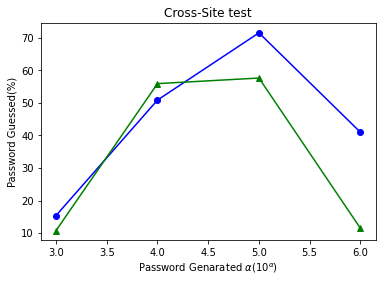

In [20]:
x = [3, 4, 5, 6]
y = {
    'myspace': [],
     'phpbb': []
}

for data_name in ['myspace', 'phpbb']:
  for alpha in x:
    gen_psw_file = '/content/{}_{}_part.txt'.format(data_name, alpha)
    gen_psw = np.loadtxt(gen_psw_file, dtype=str, delimiter = '\n')
    gen_psw = np.unique(gen_psw)  # 去重

    mr = calc_matching_rate(gen_psw, test_data[data_name])
    print('data_name：{}, alpha：{}, unique value：{}, mr：{:.2f}%'.format(data_name, alpha, gen_psw.shape[0], mr*100))
    y[data_name].append(mr * 100)

plt.plot(x, y['myspace'], 'bo-', label='Myspace')
plt.plot(x, y['phpbb'], 'g^-', label='phpBB')
plt.title('Cross-Site test')
plt.xlabel(r'Password Genarated $\alpha(10^{\alpha})$') 
plt.ylabel("Password Guessed(%)")
plt.show()

## cross-site test

### 加载测试数据集

In [8]:
rockyou = np.loadtxt('/content/rockyou.txt', dtype=str, delimiter = '\n', skiprows=1)
rockyou = np.char.strip(rockyou)
print(rockyou.shape)
print(rockyou[:5])

(76911,)
['D6' 'D5' 'D9' 'L8' 'D7']


### 生成密码
分别使用phpbb和myspace全部数据训练的PL模型生成密码

In [9]:
# 使用phpbb全部数据训练的PL模型生成密码
data_name = 'phpbb'
with open('/content/{}.pkl'.format(data_name), 'rb') as file:
    tokenizer = pickle.load(file)
max_length = max_lengths[data_name]

pl_model = load_model('/content/{}.h5'.format(data_name))  # 使用全部数据训练的模型
for alpha in [3, 4, 5, 6]:
    generating(pl_model, '{}{}.txt'.format(data_name, alpha), cnt=int(math.pow(10, alpha)))

In [ ]:
# 使用myspace全部数据训练的PL模型生成密码
data_name = 'myspace'
with open('/content/{}.pkl'.format(data_name), 'rb') as file:
    tokenizer = pickle.load(file)
max_length = max_lengths[data_name]

pl_model = load_model('/content/{}.h5'.format(data_name))  # 使用全部数据训练的模型
for alpha in [3, 4, 5, 6]:
    generating(pl_model, '{}{}.txt'.format(data_name, alpha), cnt=int(math.pow(10, alpha)))

In [25]:
# gen_word_list_file = '/content/{}{}.txt'.format('myspace', 3)
# gen_word_list = np.loadtxt(gen_word_list_file, dtype=str, delimiter = '\n')
# gen_word_list = np.unique(gen_word_list)

# print(gen_word_list.shape)
# print(gen_word_list[:5])

(862,)
['D1' 'D1 D2 L2 D4' 'D1 L1 D1 L1 D1 L2 D1 L1' 'D1 L1 D1 L1 D1 L4'
 'D1 L1 D1 L3 S1 L1']


### 计算匹配率

data_name：myspace, alpha：3, unique value：862, mr：0.93%
data_name：myspace, alpha：4, unique value：5206, mr：5.04%
data_name：myspace, alpha：5, unique value：13264, mr：8.68%
data_name：myspace, alpha：6, unique value：11895, mr：5.84%
data_name：phpbb, alpha：3, unique value：925, mr：1.03%
data_name：phpbb, alpha：4, unique value：6196, mr：6.36%
data_name：phpbb, alpha：5, unique value：11382, mr：8.33%
data_name：phpbb, alpha：6, unique value：2479, mr：0.88%


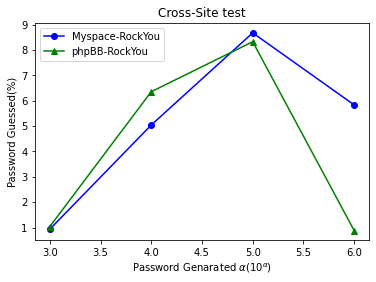

In [10]:
x = [3, 4, 5, 6]
y = {
    'myspace': [],
     'phpbb': []
}

for data_name in ['myspace', 'phpbb']:
  for alpha in x:
    gen_psw_file = '/content/{}{}.txt'.format(data_name, alpha)
    gen_psw = np.loadtxt(gen_psw_file, dtype=str, delimiter = '\n')
    gen_psw = np.unique(gen_psw)  # 去重

    mr = calc_matching_rate(gen_psw, rockyou)
    print('data_name：{}, alpha：{}, unique value：{}, mr：{:.2f}%'.format(data_name, alpha, gen_psw.shape[0], mr * 100))
    y[data_name].append(mr * 100)

plt.title('Cross-Site test')
plt.plot(x, y['myspace'], 'bo-', label='Myspace-RockYou')
plt.plot(x, y['phpbb'], 'g^-', label='phpBB-RockYou')
plt.legend()
plt.xlabel(r'Password Genarated $\alpha(10^{\alpha})$') 
plt.ylabel("Password Guessed(%)")
plt.show()

# GenPass模型评估

# 其他命令

## 解压文件

In [7]:
!unzip '/content/lstm_1.zip'
!unzip '/content/tokenizer.zip'

Archive:  /content/lstm_1.zip
  inflating: phpbb.h5                
  inflating: phpbb_part.h5           
  inflating: myspace.h5              
  inflating: myspace_part.h5         
Archive:  /content/tokenizer.zip
  inflating: phpbb.pkl               
  inflating: rockyou.pkl             
  inflating: myspace.pkl             


In [9]:
!unzip '/content/rockyou.zip'

Archive:  /content/rockyou.zip
  inflating: rockyou.txt             
